In [1]:
import numpy as np
from numpy import (savez,load,save)
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
urllib.request.urlretrieve("https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-01.csv", "yellow_2021_01.csv")
df = pd.read_csv("yellow_2021_01.csv", cache_dates=True)

c:\users\ym15c.fsu\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Below are some supplemental figures generated using the same data set.
Here I explored the effect of ride rate type on the total amount of taxi bill and payment type.
Lastly, the ratio between the tip and the total bill does not seem to vary by days of week.

In [3]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df['hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)
df = df.dropna(how='any')
df['day'] = pd.Categorical(df['day'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

Text(0.5, 1, 'Group ride')

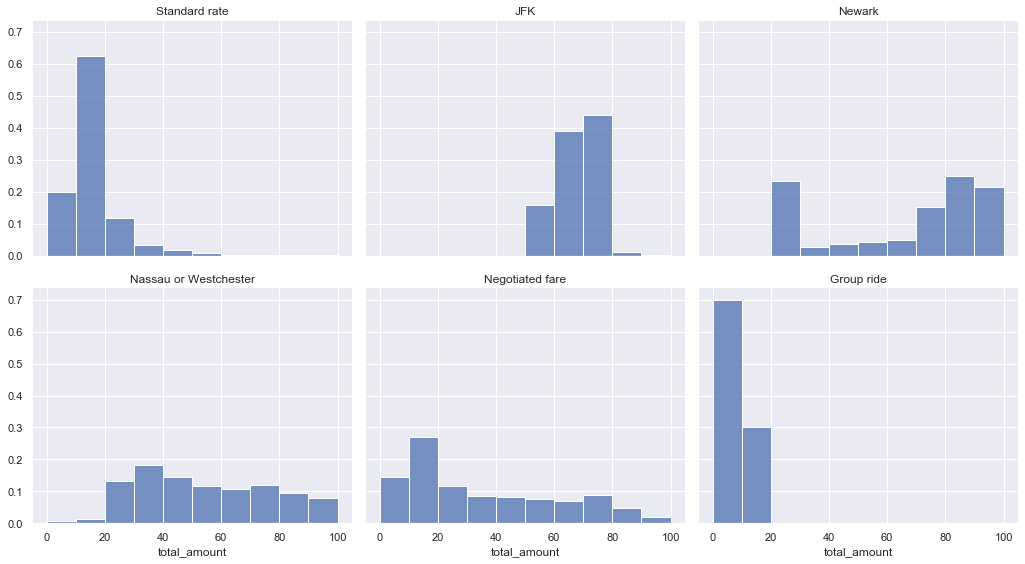

In [4]:
df_trip = df[(df['RatecodeID'] != 99) & (df['total_amount']>0)]

sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df_trip, col="RatecodeID", height = 4, aspect = 1.2, col_wrap = 3)
g.map(sns.histplot, "total_amount", binwidth=10, stat='probability', binrange=(0,100))

axes = g.axes.flatten()
axes[0].set_title("Standard rate")
axes[1].set_title("JFK")
axes[2].set_title("Newark")
axes[3].set_title("Nassau or Westchester")
axes[4].set_title("Negotiated fare")
axes[5].set_title("Group ride")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Total bill by rate type')

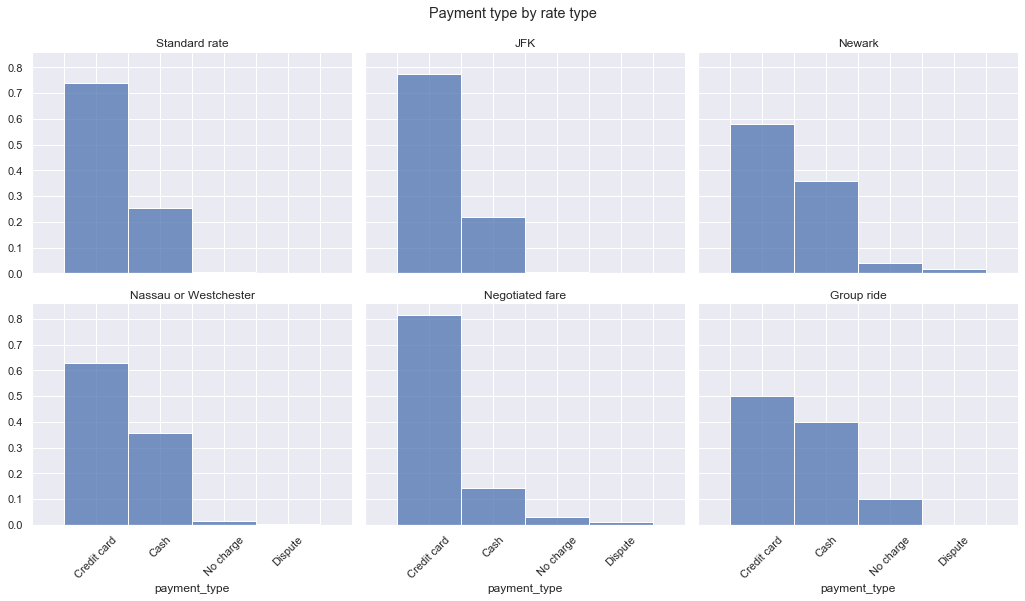

In [5]:
df_trip = df[(df['RatecodeID'] != 99) & (df['total_amount']>0)]

sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df_trip, col="RatecodeID", height = 4, aspect = 1.2, col_wrap = 3)
g.map(sns.histplot, "payment_type", binwidth=1, stat='probability',binrange=(1,5), )

axes = g.axes.flatten()
axes[0].set_title("Standard rate")
axes[1].set_title("JFK")
axes[2].set_title("Newark")
axes[3].set_title("Nassau or Westchester")
axes[4].set_title("Negotiated fare")
axes[5].set_title("Group ride")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Payment type by rate type')
g.set_xticklabels(['' , '','Credit card', '' , 'Cash', '', 'No charge', '', 'Dispute'] ,rotation = 45)


c:\users\ym15c.fsu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0.98, 'tips by days of a week')

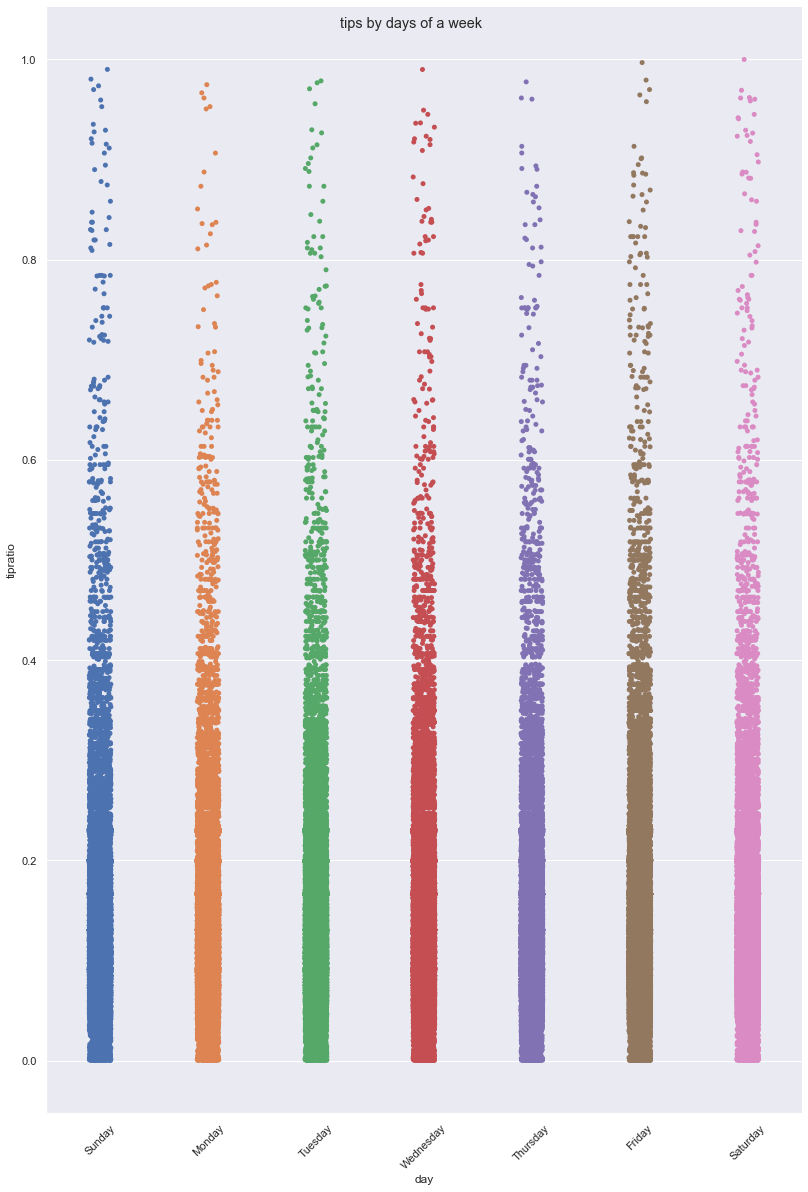

In [7]:
df_tip = df[(df['tip_amount'] > 0) & (df['payment_type']==1)]
df_tip['tipratio'] = df_tip['tip_amount']/df_tip['total_amount']

g = sns.catplot(x="day", y="tipratio", data=df_tip, order=['Sunday', 'Monday',  'Tuesday',
       'Wednesday','Thursday', 'Friday','Saturday'], aspect=0.7, height=16)
g.set_xticklabels( labels=['Sunday', 'Monday',  'Tuesday',
       'Wednesday','Thursday', 'Friday','Saturday'], rotation = 45)

g.fig.suptitle('tips by days of a week')